<참고 자료>

공공데이터로 파이썬 데이터 분석 시작하기 - 인프런

https://www.inflearn.com/course/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0/dashboard

# 상가정보 분석하기

# 라이브러리 로드

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 설정

In [4]:
# 한글포트 설정
plt.rc("font", family="Malgun Gothic")

# -값이 깨질때 
plt.rc("axes", unicode_minus=False)

In [5]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 하기

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 한글폰트 설정 확인

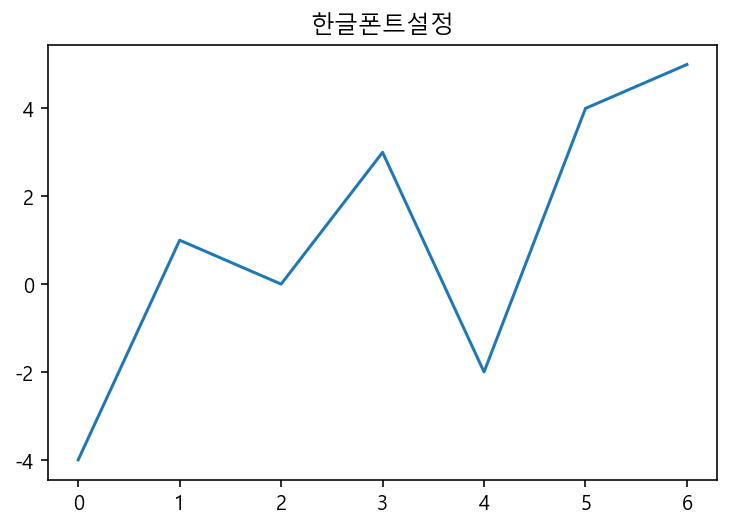

In [6]:
pd.Series([-4, 1, 0, 3,-2, 4, 5]).plot(title="한글폰트설정")


# 파일로드

In [7]:
df = pd.read_csv('상가업소정보_201912_01.csv', sep="|")
df.shape

(573680, 39)

In [8]:
# 모든 컬럼이 표시되도록 max_columns의 수를 지정

pd.options.display.max_columns = 39

# 미리보기

## head, tail

In [9]:
# head로 미리보기

df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [11]:
# tail로 미리보기

df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144056500,공덕동,1144010200,공덕동,1144010200201050067,1,대지,105,67.0,서울특별시 마포구 공덕동 105-67,114404139142,서울특별시 마포구 마포대로14길,4,NaN,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11200,성동구,1120069000,성수2가3동,1120011500,성수동2가,1120011500202890015,1,대지,289,15.0,서울특별시 성동구 성수동2가 289-15,112004109367,서울특별시 성동구 성수일로8길,37,NaN,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11680,강남구,1168052100,논현1동,1168010800,논현동,1168010800201650008,1,대지,165,8.0,서울특별시 강남구 논현동 165-8,116802102001,서울특별시 강남구 강남대로,492,NaN,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11560,영등포구,1156054000,여의동,1156011000,여의도동,1156011000200230000,1,대지,23,NaN,서울특별시 영등포구 여의도동 23,115603118002,서울특별시 영등포구 국제금융로,10,NaN,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11320,도봉구,1132051100,창1동,1132010700,창동,1132010700208120000,1,대지,812,NaN,서울특별시 도봉구 창동 812,113204127109,서울특별시 도봉구 도봉로114길,22,8.0,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


## 인덱스 정보 보기

In [12]:
df.index

RangeIndex(start=0, stop=573680, step=1)

## 컬럼명만 보기

In [17]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## info

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

## 데이터 타입 보기

In [19]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

#  결측치 확인하기

In [20]:
# 결측치를 구해서 n이라는 변수에 담기

n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

## 결측치 시각화

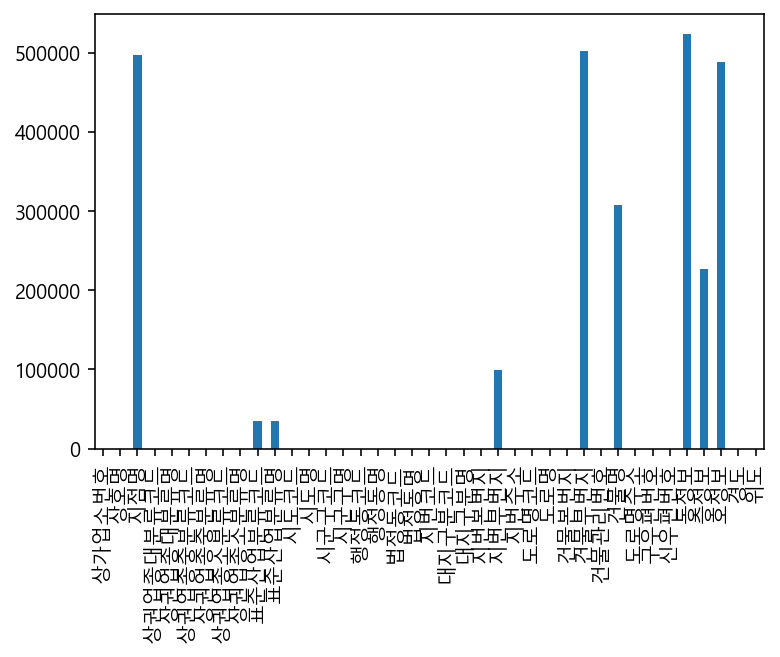

In [21]:
# 막대그래프로 시각화

n.plot.bar()

In [ ]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그린다

n.sort_values().plot.barh(figsize=(7,8))

## missingno로 결측치 시각화 하기

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
# heatmap으로 표현
# 1에 가까울수록 상관관계가 높다.

msno.heatmap(df)

In [ ]:
# dendrogram으로 표현

msno.dendrogram(df)

# 사용하지 않는 컬럼 제거

## 7.1 결측치가 너무 많은 컬럼 제거

In [ ]:
# sort_values를 통해 결측치가 많은 데이터를 위해서 9개 가져와서 not_use 변수에 담기
# not_use 변수에 담긴 인덱스 값만 추출해서 not_use_col 변수에 담기

not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

In [ ]:
# 사용하지 않는 컬럼을 제거하고 되었는지 shape의 수 확인
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

In [ ]:
# info()를 통해 해당 컬럼이 제거되었는지 확인하며 메모리 사용량이 줄어들었는지 확인

df.info()

## 사용하지 않는 컬럼 제거하기

In [ ]:
# 컬럼명을 전처리 하기 위해 cols 변수에 담기
cols = df.columns
cols

In [ ]:
# 해당되는 컬럼만 찾아와서 cols_code 변수에 담기


cols_code = cols[cols.str.contains("코드|번호")]
cols_code

In [ ]:
# "코드", "번호"가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거
#  제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인

print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

In [ ]:
df.info()

# 행, 열을 기준으로 값을 가져오기

## 열 기준
- df[열이름]
    - 결과가 Pandas 의 Series 형태로 반환
    
    
    
    
- df[[열목록]] : 2개 이상의 열을 가져올 때
    - 결과가 Pandas 의 DataFrame 형태로 변환
    - 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환

In [ ]:
# "상호명" 컬럼만 가져온다

df["상호명"].head()

In [ ]:
# "상호명", "도로명 주소" 2개의 컬럼

df[["상호명", "도로명주소"]].head()

## 행 기준

- df.loc[행]
- df.loc[행, 열]


- df.loc[행이름 혹은 번호]
    - 결과가 Pandas의 Series 형태로 반환
    
    
- df.loc[[행목록]] : 2개 이상의 행을 가져올 때 열을 가져올 때와 마찬가지로 리스트형태로 묶어서 지정
    - 결과가 Pandas의 DataFrame 형태로 반환
    - 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame형태로 반환

In [ ]:
# 0번째 인덱스 행을 가져온다

df.loc[0]

In [ ]:
# 0, 1, 2 번째 인덱스 행

df.loc[[0, 1, 2]]

In [ ]:
# 0번째 행의 "상호명"을 가져온다.

df.loc[0, "상호명"]

In [ ]:
# 0, 1, 2,번째 행의 "상호명"

df.loc[[0, 1, 2],"상호명"]

In [ ]:
# 0, 1, 2 번째 행의 "상호명", "도로명 주소"

df.loc[[0, 1, 2] , ["상호명", "도로명주소"]]

## iloc로 슬라이싱을 통해 가져오기

* df.iloc[:] 전체 데이터 가져오기
* df.iloc[행, 열] 순으로 인덱스 번호 지정
* : = 전체 의미
* 시작인덱스:끝나는인덱스+1
    - ex) 3:5 라면 3번째 인덱스부터 4번째 인덱스까지 가져온다
* :에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 끝까지 의미


In [ ]:
# 위에서 5개의 행과, 왼쪽에서 5개의 열

df.iloc[:5,:5]

In [ ]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열

df.iloc[-5:,-5: ]

# 기술통계 값 보기

## describe로 요약하기
- describe를 사용하면 데이터를 요약
- 기본적으로 수치형 데이터 요약
- include, exclude 옵션으로 데이터 타입에 따른 요약 수치
- 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%),3사분위수(75%), 최댓값

In [ ]:
# describe 로 기술통계값 보기
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.

df.describe()

In [ ]:
# 필요한 컬럼에 대한 요약
# 위도, 경도만 따로 가져와 요약

df[["위도", "경도"]].describe()




판다스 : https://pandas.pydata.org/docs/user_guide/computation.html#method-summary

## 개별 기술통계 값 구하기
- count결측치를 제외한 값의 개수 계산
- min,max 최솟값, 최댓값
- argmin, argmax 최솟값, 최댓값이 위치한 인덱스를 반환
- idxmin, idxmax 인덱스 중 최솟값, 최댓값 반환
- quantile 특정 사분위수에 해당
    - 0.25 : 1사분위수
    - 0.5 : 2사분위수
    - 0.75 : 3사분위수
- sum 수치 데이터 합계
- mean 평균
- median 중앙값
- mad 평균값으로부터 절대 편차
- std, var 표준편차, 분산을 계산
- cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산
- cumprod 맨 첫 번째 성분부터 각 성분까지의 누적곱을 계산

In [ ]:
# 결측치를 제와한 값의 갯수 계산

df["위도"].count()

In [ ]:
# 평균
df["위도"].mean()

In [ ]:
# 최댓값
df["위도"].max()

In [ ]:
# 최솟값
df["위도"].min()

In [ ]:
# 1사분위 수(25%)
df["위도"].quantile(q=0.25)

In [ ]:
# 2사분위 수(25%) == 중앙값
df["위도"].quantile()

In [ ]:
# 중앙값
df["위도"].median()

In [ ]:
# 중앙값 vs 평균값
df["위도"].mean()

In [ ]:
# 분산
df["위도"].var()

In [ ]:
# 표준편차 => 분산에 root를 씌운 값

import numpy as np

np.sqrt(df["위도"].var())

In [ ]:
df["위도"].std()

## 단변량 수치형 변수 시각화

In [ ]:
# 위도의 distplot 을 그린다

sns.distplot(df["위도"])

In [ ]:
# 경도의 distplot을 그린다

sns.distplot(df["경도"])

In [ ]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을 linestyle로 점선 표시

plt.axvline(df["위도"].mean(), linestyle=":", color="r")
plt.axvline(df["위도"].median(), linestyle="--")
sns.distplot(df["위도"])

## 상관계수

In [ ]:
# 각 변수의 상관계수 

corr = df.corr()
corr

In [ ]:
# 위에서 구한 상관계수를 시각화

mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

seaborn : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

## 산점도로 이변량 수치형 변수 표현

In [ ]:
# scatterplot으로 경도와 위도를 표현하며
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000개의 샘플을 추출

sns.scatterplot(data=df.sample(1000), x="경도", y="위도")

In [ ]:
# 위 시각화에서 회귀선을 그린다

sns.regplot(data=df.sample(1000), x="경도", y="위도")

In [ ]:
# 회귀선을 그리는 그래프의 서브플롯을 그린다

sns.lmplot(data=df.sample(1000), x="경도", y="위도", hue="시도명",col="시도명")

## object 타입의 데이터로요약

In [ ]:
# include = "object" 로 문자열 데이터에 대한 요약

df.describe(include = "object")

In [ ]:
# 상권업종대분류명 의 요약값

df["상권업종대분류명"].describe()

In [ ]:
# 상권업종대분류명 의 unique 값

df["상권업종대분류명"].unique()


In [ ]:
# 상권업종대분류명 의 unique 값의 갯수

df["상권업종대분류명"].nunique()

In [ ]:
df["상권업종대분류명"].mode()

## 범주형 변수의 빈도수 구하기

In [ ]:
# value_counts 로 상권업종대분류명 의 빈도수를 구한다.

df["상권업종대분류명"].value_counts()

# 인덱싱과 필터로 서브셋 만들기

In [ ]:
# "상권업종대분류명" 이 "음식"인 데이터만 가져오기
# df_food 변수에 담기

df_food = df[df["상권업종대분류명"] == "음식"].copy()
df_food.head()

## 강남구의 상권업종대분류가 음식만 보기

In [ ]:
# 시군구명이 "강남구" 인 데이터만 가져오기

df[df["시군구명"] == "강남구"].head()

In [ ]:
# 시군구명 "강남구"이고 "상권업종대분류명"이 "음식"인 서브셋
# "상권업종중분류명" 별로 빈도수

df[(df["시군구명"] == "강남구") & 
   (df["상권업종대분류명"] == "음식")]["상권업종중분류명"].value_counts()

In [ ]:
# loc 사용

df.loc[(df["시군구명"] == "강남구") & (df["상권업종대분류명"] == "음식"), 
       "상권업종중분류명"].value_counts()

## 구별 음식점 업종 비교하기

In [ ]:
#df_seoul_food에 "시도명"이 "서울특별시"이고 "상권업종대분류명" 이 "음식"에 대한 서브셋만 가져와서 담아준다

df_seoul_food = df[(df["시도명"] =="서울특별시") & (df["상권업종대분류명"] == "음식")].copy()
df_seoul_food.shape

In [ ]:
# "시군구명", "상권업종중분류명"으로 그룹화 해서 상점수 세어보기
# 결과는 food_gu에 담아 재사용

food_gu = df_seoul_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()
food_gu

In [ ]:
# food_gu에 다긴 데이터 시각화
# 상권업종중분류명 과 상점수로 barplot 그리기

food_gu.unstack().loc["강남구"].plot.bar()

In [ ]:
food = food_gu.reset_index()
food = food.rename(columns={"상호명":"상호수"})
food.head()

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(data=food, x="상권업종중분류명", y="상호수")

In [ ]:
# catplot을 사용하여 서브프롯을 그리기

sns.catplot(data=food,x="상권업종중분류명", y="상호수", kind="bar", col="시군구명", col_wrap=2)

참고자료 : https://seaborn.pydata.org/tutorial/categorical.html

# 구별 학원수 비교

## 서브셋 만들고 집계하기

In [ ]:
# 학원의 분류명을 알아보기 위해 "상권업종대분류명"의 unique 값을 추출

df["상권업종대분류명"].unique()

In [ ]:
# "시도명"이 "서울특별시"이고 "상권업종대분류명"이 "학문/교육"인 데이터를 서브넷으로 가져오기
# 재사용을 위해 서브셋을 df_academy에 적당

df_academy = df[(df["시도명"] == "서울특별시") & (df["상권업종대분류명"] == "학문/교육")].copy()
df_academy.head()

In [ ]:
# df_academy 에서 "상호명"으로 빈도수 구하기

df_academy["상호명"].value_counts().head(10)

In [ ]:
# "시군구명" 으로 빈도수 구하기

df_academy["시군구명"].value_counts().head(10)

In [ ]:
# "상권업종소분류명"으로 빈도수 구하기

academy_count = df_academy["상권업종소분류명"].value_counts().head(30)
academy_count

In [ ]:
# 빈도수가 1000개 이상인 데이터만 따로 보기

academy_count_1000 = academy_count[academy_count >= 1000]
academy_count_1000

In [ ]:
# "시군구명", "상권업종소분류명"으로 그룹화를 하고 "상호명"으로 빈도수를 계싼

academy_group = df_academy.groupby(["시군구명", "상권업종소분류명"])["상호명"].count()
academy_group

In [ ]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot 그리기

t = academy_group.reset_index()
t = t.rename(columns = {"상호명": "상호수"})
t.head()

## Seaborn으로 시각화

In [ ]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot 그리기

plt.figure(figsize=(20, 5))
sns.barplot(data=t, x="시군구명", y="상호수")

## isin을 사용해 서브셋 만들기
* 상권업종소분류명을 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 보기

In [ ]:
academy_count_1000.index

In [ ]:
# isin으로 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 보기
# 서브셋을 df_academy_selectsd 에 저장

print(df_academy.shape)

df_academy_selected = df_academy[
    df_academy["상권업종소분류명"].isin(academy_count_1000.index)].copy()
df_academy_selected.shape


In [ ]:
df_academy_selected["상권업종소분류명"].value_counts()

In [ ]:
# df_academy_selected 의 "시군구명"으로 빈도수 세기

df_academy_selected["시군구명"].value_counts()

In [ ]:
df_academy_selected.loc[
    df_academy_selected["법정동명"] == "대치동", "상권업종소분류명"].value_counts()


In [ ]:
df_academy_selected.loc[
    df_academy_selected["법정동명"] == "목동", "상권업종소분류명"].value_counts()


In [ ]:
# df_academy_selected로 위에서 했던 그룹화 복습
# "상권업종소분류명", "시군구명"으로 그룹화하고 "상호명"으로 빈도수 계산
# g 라는 변수에 담아 재사용


g = df_academy_selected.groupby(["상권업종소분류명", "시군구명"])["상호명"].count()
g

## Pandas의 plot으로 시각화

In [ ]:
# "상권업종소분류명"이 index로 되어있다.
# loc를 통해 index 값을 가져올 수 있다.
# 그룹화된 결과 중 "학원-입시" 데이터만 가져올 수 있다


g.loc["학원-입시"].sort_values().plot.barh(figsize=(10, 9))

## unstakc() 이해하기

In [ ]:
# 위에서 그룹화한 데이터를 unstack() 하고 iloc로 위에서 5개 왼쪽에서 5개만 서브셋

g.unstack().iloc[:5,:5]

In [ ]:
# 그룹화된 결과에 unstack을 사용하면 마지막 인덱스 컬럼이 컬럼으로 바뀐다.

g.unstack().plot.barh(figsize=(10, 8))

In [ ]:
g

In [ ]:
# 구별로 학원 수 시각화 하기 unstack() 값에 transpose를 하면 행과 열이 바뀐다

g.unstack().T.plot.bar(figsize=(15, 5))

In [ ]:
# 그룹화 한 값의 인덱스를 출력

g.index

In [ ]:
# 멀티인덱스보다 컬럼으로 접근이 편하기 때문에 reset_index를 통해 인덱스값을 컬럼으로 만들어준다.
# "상호명" 컬럼은 "상호수" 이기 때문에 컬럼명 변경

t = g.reset_index()
t = t.rename(columns={"상호명":"상호수"})
t

## 같은 그래프를 seaborn으로 그리기

In [ ]:
# x축에 시군구명을 y축에 상호수를 막대그래로 그리기
# 상권업종소분류명 으로 색상을 다르게 표현

plt.figure(figsize=(15, 5))
sns.barplot(data=t, x="시군구명", y="상호수", ci=None)

In [ ]:
# x축에 상권업종소분류명을 y축에 상호수를 막대그래프로 그리기
# 시군구명으로 색상을 다르게 표현

plt.figure(figsize=(15, 5))
sns.barplot(data=t, x="상권업종소분류명", y="상호수", ci=None)

In [ ]:
# "상권업종소분류명"이 "학원-입시" 인 서브셋만 가져와서 시각화

academy_sub = t[t["상권업종소분류명"] == "학원-입시"].copy()
print(academy_sub.shape)

plt.figure(figsize=(15, 4))
sns.barplot(data=academy_sub, x="시군구명", y="상호수")

In [ ]:
# catplot을  통해 서브플롯 그리기

sns.catplot(data=t, x="상권업종소분류명", y="상호수", kind="bar", 
            col="시군구명", col_wrap=4, sharex=False)

## 경도와 위도를 scatterplot으로 그리기

In [ ]:
# scatterplot 으로 경도와 위도를 표현하고 시군구명으로 색상을 다르게 표현

plt.figure(figsize=(12, 9))
sns.scatterplot(data=df_academy_selected, x="경도", y="위도", hue="시군구명")



In [ ]:
# scatterplot 으로 경도와 위도를 표현하고 상권업종소분류명으로 색상을 다르게 표현

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_academy_selected, x="경도", y="위도", hue="상권업종소분류명")

In [ ]:
# "상권업종소분류명"이 "학원-입시" 인 데이터만 그리기

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"]=="학원-입시"], x="경도", y="위도", hue="상권업종소분류명")

In [ ]:
# "상권업종소분류명"이 "어린이집" 인 데이터만 그리기

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_academy_selected[df_academy_selected["상권업종소분류명"]=="어린이집"], x="경도", y="위도", hue="상권업종소분류명")

In [ ]:
# 어린이집과 학원-입시를 비교

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data = df_academy_selected[
        df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])], 
    x="경도", y="위도", hue="상권업종소분류명")

# Folium 사용예제

In [ ]:
# 위에서 그렸던 어린이집과 학원-입시에 대한 상호 데이터를 지도에 시각화

import folium 



In [ ]:
long = df_academy_selected["경도"].mean()
lat = df_academy_selected["위도"].mean()

In [ ]:
df_m = df_academy_selected[
        df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])]

df_m = df_m.sample(1000)
df_m.shape

In [ ]:
m = folium.Map(location=[lat, long], zoom_start=12)
m